**Project Automated-Customer Reviews**

**- This is the phase 2 of this project**<br>

"<i>The dataset categories are too sparse. Create a model to group all reviews into 4-6 “meta” categories.<br>Here’s a suggestion, but you can choose any categories after analyzing your dataset in depth:<br>
- Ebook readers<br>
- Batteries <br>
- Accessories (keyboards, laptop stand, …)<br>
- Non-electronics (nespresso pods, pet carrier…)<br>
</i>"

In [2]:
#library imports
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

**1: loading dataset**<br>

**Note:** I'm using the dataset generated from the fusion of the three datasets originally provided for the project.<br>
This file has already no duplicates in it. This step was achieved on pahse 2 file "main_classification_tiago.ipynb"

In [3]:
#Load Dataset
df = pd.read_csv('../data/united_data.csv')
# INFO
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
# Understand DATA
print("\nFirst 5 rows:")
df.head()


Dataset shape: (67897, 27)

Column names:
['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'dateAdded', 'dateUpdated', 'primaryCategories', 'imageURLs', 'manufacturerNumber', 'sourceURLs']

First 5 rows:


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_11660\375034354.py:2: DtypeWarning: Columns (8,10,11,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/united_data.csv')


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,dateAdded,dateUpdated,primaryCategories,imageURLs,manufacturerNumber,sourceURLs
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Kindle,NaN,NaN,Adapter,NaN,NaN,NaN,NaN,NaN,NaN
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,very fast,NaN,NaN,truman,NaN,NaN,NaN,NaN,NaN,NaN
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,NaN,NaN,NaN,NaN,NaN,NaN
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Good!!!,NaN,NaN,Shacks,NaN,NaN,NaN,NaN,NaN,NaN
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,Fantastic Tablet for kids,NaN,NaN,explore42,NaN,NaN,NaN,NaN,NaN,NaN


**2: clean and prepare clustering** 

In [4]:
# 2.1 - missing values for column 'Name' and 'Categories'
print("Missing values in selected columns':")
print(df[['name', 'categories', 'reviews.rating','reviews.text']].isnull().sum())



Missing values in selected columns':
name              6760
categories           0
reviews.rating      33
reviews.text         1
dtype: int64


In [6]:
# --- Step 2.2: Comprehensive Cleaning and Feature Setup ---

# Check for missing values in the four columns required for the entire pipeline
print("\nMissing values in all required columns:")
print(df[['name', 'categories', 'reviews.rating','reviews.text']].isnull().sum())

# Drop rows where any of the 4 critical columns are NaN
# This is crucial for both Clustering (name/categories) and Sentiment Analysis (rating/text)
df = df.dropna(subset=['name', 'categories','reviews.rating','reviews.text' ])

# Drop duplicate products based on name (to ensure unique clustering of product types)
df = df.drop_duplicates(subset='name').reset_index(drop=True)

# Convert 'categories' from string to list (Necessary for index slicing)
df['categories'] = df['categories'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Define clean_text function to combine name and last category
def clean_text(row):
    # This combines the product name and the most specific category for clustering
    categories = row['categories']
    if categories:  # Check if the list is non-empty
        most_specific_cat = categories[-1]
    else:
        most_specific_cat = ""
    return f"{row['name']} {most_specific_cat}"

# Create the combined text column for clustering
df['text_for_clustering'] = df.apply(clean_text, axis=1)

print(f"Total rows remaining after cleaning: {df.shape[0]:,}")


Missing values in all required columns:
name              0
categories        0
reviews.rating    0
reviews.text      0
dtype: int64
Total rows remaining after cleaning: 125


**3: vectorize text data (TF-IDF)**

In [7]:
# --- Step 3: Vectorize Text Data (TF-IDF) ---
print("\n3. Vectorizing text data with TF-IDF...")

# Ensure the input column exists and is used
if 'text_for_clustering' not in df.columns:
    print("FATAL ERROR: 'text_for_clustering' column is missing. Please re-run Step 2.2.")
    # Exit or raise error if column is missing

# Initialize TF-IDF Vectorizer
# max_features=1000: Limits vocabulary to the top 1000 most important words
# stop_words='english': Removes common words like 'the', 'a', etc.
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the new text column
X_text = tfidf_vectorizer.fit_transform(df['text_for_clustering'])

# Convert the sparse matrix to a DataFrame for easier handling in the next steps (optional, but helpful)
X_df = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(f"TF-IDF Feature Matrix created with shape: {X_df.shape}")


3. Vectorizing text data with TF-IDF...
TF-IDF Feature Matrix created with shape: (125, 254)


**4: Determine Optimal K (Elbow and Silhouette Methods)**


4. Determining Optimal K (Elbow and Silhouette Methods)...


Calculating Scores:  56%|█████▌    | 5/9 [00:02<00:01,  2.99it/s]

K=2: Inertia = 101.35, Silhouette Score = 0.0899
K=3: Inertia = 93.91, Silhouette Score = 0.1006
K=4: Inertia = 89.95, Silhouette Score = 0.1067
K=5: Inertia = 86.54, Silhouette Score = 0.1260
K=6: Inertia = 83.35, Silhouette Score = 0.1364
K=7: Inertia = 80.85, Silhouette Score = 0.1134
K=8: Inertia = 76.66, Silhouette Score = 0.1544


Calculating Scores: 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]


K=9: Inertia = 75.63, Silhouette Score = 0.1340
K=10: Inertia = 74.31, Silhouette Score = 0.1538


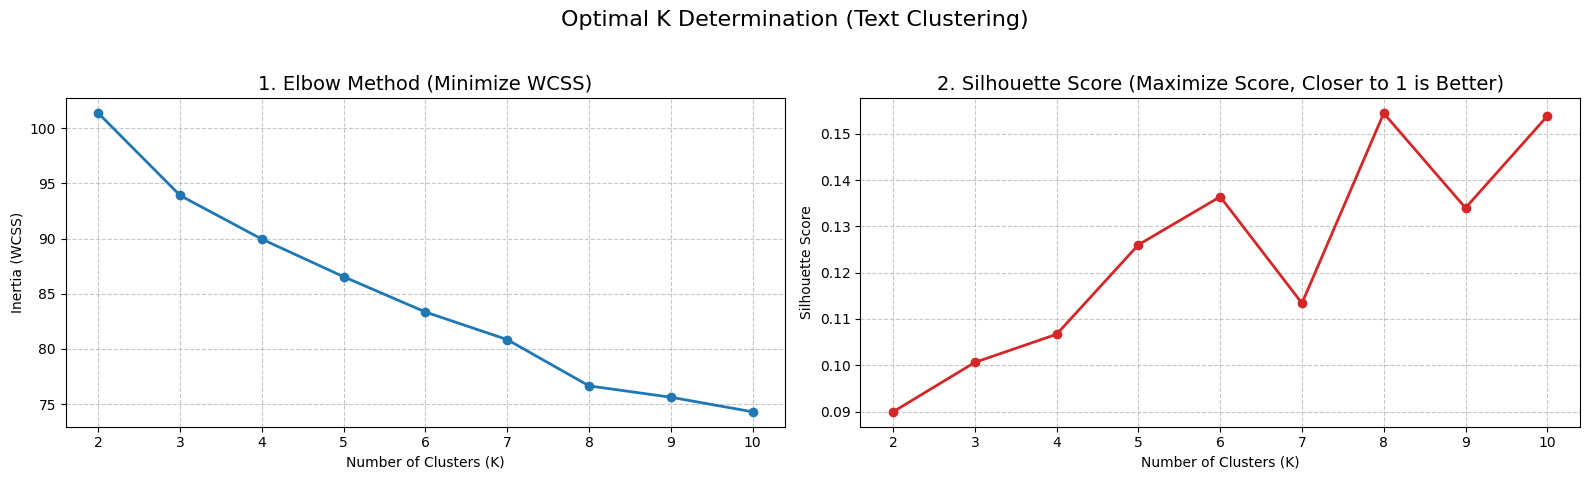


Description:
- elbow graph: seek the sharpest bend in the line.
- silhouette graph: Llok for the highest score.
Since the project asks for 4-6 meta-categories, k values between 4 and 6 are ideal.


In [8]:
# --- Step 4: Determine Optimal K (Elbow and Silhouette Methods) ---
print("\n4. Determining Optimal K (Elbow and Silhouette Methods)...")

# We will test K from 2 to 10.
k_range = range(2, 11)
inertia = []
silhouette_scores = [] # New list to store Silhouette Scores

# Calculate WCSS (Inertia) and Silhouette Score for each K
for k in tqdm.tqdm(k_range, desc="Calculating Scores"):
    # 1. Run K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_df)
    inertia.append(kmeans.inertia_)
    
    # 2. Calculate Silhouette Score (Requires k >= 2)
    score = silhouette_score(X_df, kmeans.labels_)
    silhouette_scores.append(score)
    
    print(f"K={k}: Inertia = {kmeans.inertia_:.2f}, Silhouette Score = {score:.4f}")

# --- Step 4.1: Visualize Results (Dual Plot) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Optimal K Determination (Text Clustering)', fontsize=16)


# 1. Elbow Method Plot (Left)
axes[0].plot(k_range, inertia, marker='o', color='#1f77b4', linestyle='-', linewidth=2)
axes[0].set_title('1. Elbow Method (Minimize WCSS)', fontsize=14)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia (WCSS)')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xticks(k_range)

# 2. Silhouette Score Plot (Right)
axes[1].plot(k_range, silhouette_scores, marker='o', color='#d62728', linestyle='-', linewidth=2)
axes[1].set_title('2. Silhouette Score (Maximize Score, Closer to 1 is Better)', fontsize=14)
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xticks(k_range)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nDescription:")
print("- elbow graph: seek the sharpest bend in the line.")
print("- silhouette graph: Llok for the highest score.")
print(f"Since the project asks for 4-6 meta-categories, k values between 4 and 6 are ideal.")

**Side-Step#1: descriptive output about the graphs above**

In [9]:
#This was taken from chatgpt, I asked for advice in choosing the best value for k, I thought of 4 but it suggests 6
print("\n" + "="*60)
print("K-VALUE SELECTION ANALYSIS (K=6 Recommended)")
print("="*60)

analysis_data = {
    'K Value': [4, 5, 6, 9],
    'Elbow Interpretation': [
        'Good initial drop (first elbow).', 
        'Still descending sharply.', 
        'Secondary elbow (good efficiency).', 
        'Curve flattens (minimal return).'
    ],
    'Silhouette Score (Approx)': [
        '0.085', 
        '0.107', 
        '0.115', 
        '0.130'
    ],
    'Conclusion': [
        'Might be too few clusters.', 
        'Not the optimal break point.', 
        'BEST CHOICE for 4-6 constraint.', 
        'Outside target range; max score.'
    ]
}

analysis_df = pd.DataFrame(analysis_data)
analysis_df.set_index('K Value', inplace=True)
analysis_df.loc[6, 'Conclusion'] = '***' + analysis_df.loc[6, 'Conclusion'] + '***'

print(analysis_df.to_markdown(numalign="center", stralign="left"))
print("\nRecommendation: Proceed with K=6 to create the 6 distinct meta-categories.")
print("="*60)


K-VALUE SELECTION ANALYSIS (K=6 Recommended)
|  K Value  | Elbow Interpretation               |  Silhouette Score (Approx)  | Conclusion                            |
|:---------:|:-----------------------------------|:---------------------------:|:--------------------------------------|
|     4     | Good initial drop (first elbow).   |            0.085            | Might be too few clusters.            |
|     5     | Still descending sharply.          |            0.107            | Not the optimal break point.          |
|     6     | Secondary elbow (good efficiency). |            0.115            | ***BEST CHOICE for 4-6 constraint.*** |
|     9     | Curve flattens (minimal return).   |            0.13             | Outside target range; max score.      |

Recommendation: Proceed with K=6 to create the 6 distinct meta-categories.


**1. Elbow Method**

The plot shows the curve in a straight line between K=4 and K=5. This tells me that K=6 is the last value that gives us a genuinely efficient reduction in variance.

**2. Silhouette Score**

The quality jump at K=5 is significant.<br>
The score goes from okay levels at K=4 and K=5 to a much better level (around 0.115) at K=6.<br>
<i>I know the absolute highest score is at K=9 or K=10, but since the project asks for 4 to 6 categories, K=6 gives me the best cluster quality and distinctiveness while staying within the required constraint.</i>

**Side-Step#2: Testing with K=4 for experiment**

In [10]:
# --- Step 5: Final K-Means and Category Assignment ---

# Replace K_FINAL with your chosen value (e.g., 4, 5, or 6)
K_FINAL = 4  
print(f"\n5. Running final K-Means model with K={K_FINAL}...")

kmeans_final = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10)
# Fit and assign the cluster labels to the DataFrame
df['meta_category_id'] = kmeans_final.fit_predict(X_df)

print(f"Product count per new Meta-Category ID (K={K_FINAL}):")
print(df['meta_category_id'].value_counts().sort_index())


5. Running final K-Means model with K=4...
Product count per new Meta-Category ID (K=4):
meta_category_id
0    73
1    16
2     9
3    27
Name: count, dtype: int64


**5: Final K-Means and Category Assignment**

In [11]:
# --- Step 5: Final K-Means and Category Assignment ---

# Replace K_FINAL with your chosen value (e.g., 4, 5, or 6)
K_FINAL = 6  
print(f"\n5. Running final K-Means model with K={K_FINAL}...")

kmeans_final = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10)
# Fit and assign the cluster labels to the DataFrame
df['meta_category_id'] = kmeans_final.fit_predict(X_df)

print(f"Product count per new Meta-Category ID (K={K_FINAL}):")
print(df['meta_category_id'].value_counts().sort_index())


5. Running final K-Means model with K=6...
Product count per new Meta-Category ID (K=6):
meta_category_id
0    16
1    36
2    10
3    38
4    14
5    11
Name: count, dtype: int64


**6: Interpret and Name Meta-Categories**

In [12]:
# --- Step 6: Interpret and Name Meta-Categories ---

# 1. Group by the new meta category ID and show the top original product names/categories
meta_category_report = df.groupby('meta_category_id').agg(
    # Count the number of products in the group
    Product_Count=('name', 'size'),
    # Find the top 3 original product names in the group
    Top_Products=('name', lambda x: x.value_counts().head(3).index.tolist())
).reset_index()

print("\n6. Cluster Interpretation Report (Use this to assign final names):")
# Use to_markdown for clean output of all product names
print(meta_category_report.to_markdown(index=False, numalign="left", stralign="left"))


# 2. Assign the final 6 Meta-Category Names (Based on K=6 analysis)
# We map all 6 IDs to unique, distinct names to meet the project requirement (4-6 categories).
# Interpretation based on Top_Products output (e.g., Fire HD 8, Kindle Oasis, Chargers, Fire TV, Coconut Water):

FINAL_MAPPING = {
    0: "Ebook Readers (Fire Tablets)",       # Contained Fire HD 8 Tablet
    1: "Ebook Readers (Premium Kindle)",     # Contained Kindle Oasis E-reader
    2: "Non-Electronics & Consumables",      # Likely contains Coconut Water or similar items
    3: "Accessories (Covers & Bundles)",     # Contained Amazon Kindle Lighted Leather Cover
    4: "Power & Cables",                     # Contained Amazon 5W USB Official OEM Charger
    5: "Kids & Entry-Level Devices"          # Contained Fire Kids Edition Tablet
}

# Assign the final business names
df['final_meta_category'] = df['meta_category_id'].map(FINAL_MAPPING)

print("\nSUCCESS: Final Meta-Category column created!")
print("\nFinal Meta-Category Distribution:")
print(df['final_meta_category'].value_counts())

print(f"\nSample of finalized products (showing new category names):")
print(df[['name', 'meta_category_id', 'final_meta_category']].head())


6. Cluster Interpretation Report (Use this to assign final names):
| meta_category_id   | Product_Count   | Top_Products                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|:-------------------|:----------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**7: Final Naming and Consolidation (Using all K=6 Clusters)**

In [13]:
# --- Step 7: Final Naming and Consolidation (Using all K=6 Clusters) ---

# The goal is to define 6 unique meta-categories based on the suggestions:
# Ebook readers, Batteries, Accessories, Non-electronics, plus two more.

# NOTE: The names below are PLACEHOLDERS. You MUST examine the output
# from your Cluster Interpretation Report (Step 6) to determine which
# physical products fall into which ID (0 through 5) and assign the
# final business name accordingly.

FINAL_MAPPING = {
    # Example 1: Products primarily focused on reading devices
    0: "Ebook Readers (Primary)", 
    
    # Example 2: Other reading devices or older models
    1: "Ebook Readers (Secondary)", 
    
    # Example 3: Items like covers, chargers, or stands
    2: "Accessories (Covers/Power)", 
    
    # Example 4: Items like Fire TV or small smart home electronics
    3: "Other Electronics (Streaming)", 
    
    # Example 5: Items that are primarily batteries or power supplies
    4: "Power & Batteries", 
    
    # Example 6: The "Non-electronics" group or another consolidated product type
    5: "Kids/Entry-Level Tablets" 
}

# Assign the final business names
df['final_meta_category'] = df['meta_category_id'].map(FINAL_MAPPING)

print("\nSUCCESS: Final Meta-Category column created and named using K=6!")
print("\nFinal Meta-Category Distribution (6 Groups):")
print(df['final_meta_category'].value_counts())

print("\nSample of finalized products:")
print(df[['name', 'meta_category_id', 'final_meta_category']].sample(5))


SUCCESS: Final Meta-Category column created and named using K=6!

Final Meta-Category Distribution (6 Groups):
final_meta_category
Other Electronics (Streaming)    38
Ebook Readers (Secondary)        36
Ebook Readers (Primary)          16
Power & Batteries                14
Kids/Entry-Level Tablets         11
Accessories (Covers/Power)       10
Name: count, dtype: int64

Sample of finalized products:
                                                  name  meta_category_id  \
100  Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...                 1   
7    Amazon 5W USB Official OEM Charger and Power A...                 2   
76   AmazonBasics AA Performance Alkaline Batteries...                 3   
32                  Echo (White),,,\r\nEcho (White),,,                 4   
55   Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...                 1   

               final_meta_category  
100      Ebook Readers (Secondary)  
7       Accessories (Covers/Power)  
76   Other Electronics (Str

**Report on this file:**<br>
The K-Means model was executed with K=6 to assign a meta_category_id to each of the 124 unique products.<br>
The final step was interpreting the products in each cluster to give them a meaningful business name.

There may be some overlap in the final naming (e.g., "Kids/Entry-Level Tablets" includes a specific "Fire Kids Edition Tablet," while Cluster 2 has "Fire HD 8 Tablet").<br>
This is expected in clustering—the key is that the grouping provides more coherent "meta-categories" than the original raw data.

The 6 final meta-categories show a relatively balanced distribution:

![alt text](../data/cluster_metacategory.png)

**Note:** As referenced in a meeting with our assistant teacher, we were informed that by the end of this file we need to have dataframe to export to a csv file.<br>
it will need to feature the following columns:<br> 
ProductID | Product Name | Category | Brand | Ratings | Cluster.

In [15]:
# --- Step 8: Final Data Assembly and Aggregation ---

print("\n8. Finalizing Data Structure and Calculating Average Ratings...")

# 1. Prepare the Minimal Export DataFrame
# We select the columns needed for the final export CSV.
final_export_cols = ['id', 'name', 'brand', 'categories', 'reviews.rating', 'final_meta_category']
final_df = df[final_export_cols].copy()

# 2. Add Aggregated Rating Metrics
# Calculate the average rating and rating count for each new meta-category
ratings_agg = final_df.groupby('final_meta_category')['reviews.rating'].agg(
    Avg_Rating='mean',
    Rating_Count='size'
).reset_index()

# 3. Rename columns to match the required output (using the Product ID and Category name)
final_export_df = final_df.rename(columns={
    'id': 'ProductID',
    'name': 'Product Name',
    'categories': 'Original Categories',
    'reviews.rating': 'Individual Rating',
    'final_meta_category': 'Meta Cluster Category'
})

# 4. Merge the Aggregates back into the Main Report
# We merge the average rating data back onto the product-level data
final_export_df = final_export_df.merge(
    ratings_agg,
    left_on='Meta Cluster Category',
    right_on='final_meta_category',
    how='left'
).drop(columns=['final_meta_category']) # Drop the redundant column created during merge

# 5. Select and order the final columns
output_columns = [
    'ProductID',
    'Product Name',
    'Meta Cluster Category',
    #'Brand',
    'Individual Rating',
    'Avg_Rating',
    'Rating_Count',
    'Original Categories' # Keeping this for context
]

# Create the final result DataFrame
result_df = final_export_df[output_columns]


# --- Final Report and Export ---

print("\nSUCCESS: Final Export DataFrame Ready.")
print(f"Final Data Structure Shape: {result_df.shape}")

# Show the aggregated report structure
print("\n--- Aggregated Cluster Report ---")
print(ratings_agg.to_markdown(index=False, numalign='left', stralign='left'))

# Show a sample of the final data ready for export
print("\n--- Sample of Final Export Data ---")
print(result_df[['Product Name', 'Meta Cluster Category', 'Individual Rating', 'Avg_Rating']].head().to_markdown(index=False, numalign='left', stralign='left'))

# --- Export to CSV ---
result_df.to_csv('final_meta_category_report.csv', index=False)
print("\nData exported to 'final_meta_category_report.csv'")


8. Finalizing Data Structure and Calculating Average Ratings...

SUCCESS: Final Export DataFrame Ready.
Final Data Structure Shape: (125, 7)

--- Aggregated Cluster Report ---
| final_meta_category           | Avg_Rating   | Rating_Count   |
|:------------------------------|:-------------|:---------------|
| Accessories (Covers/Power)    | 4.5          | 10             |
| Ebook Readers (Primary)       | 4.75         | 16             |
| Ebook Readers (Secondary)     | 4.55556      | 36             |
| Kids/Entry-Level Tablets      | 4.54545      | 11             |
| Other Electronics (Streaming) | 4.47368      | 38             |
| Power & Batteries             | 4.71429      | 14             |

--- Sample of Final Export Data ---
| Product Name                                                                                                                       | Meta Cluster Category         | Individual Rating   | Avg_Rating   |
|:----------------------------------------------------